In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

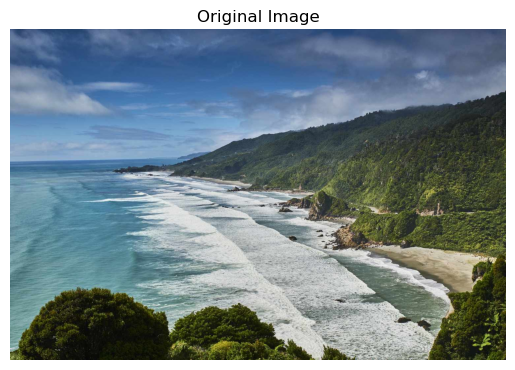

In [4]:
# Load image in BGR format
img_bgr = cv2.imread("images/New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)

# Convert to RGB (matplotlib uses RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


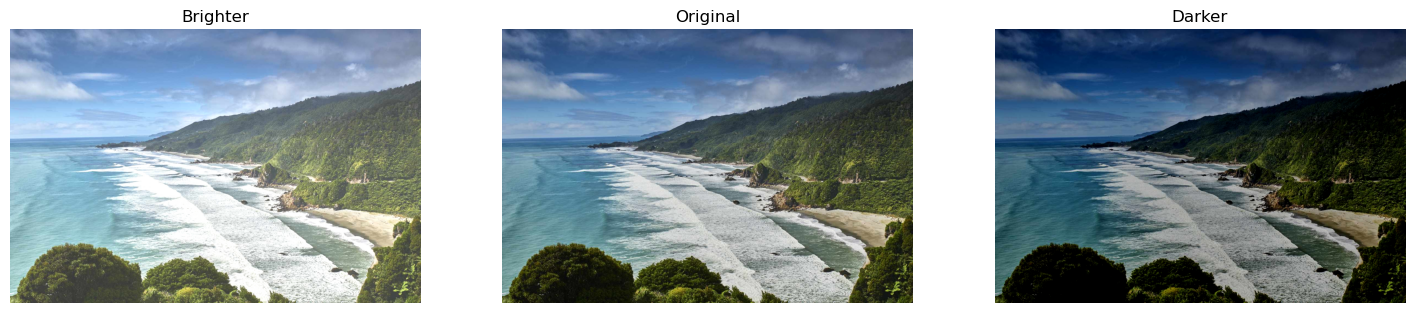

In [5]:
# Brightness adjustment
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50

# Increase brightness
img_rgb_brighter = cv2.add(img_rgb, matrix)

# Decrease brightness
img_rgb_darker = cv2.subtract(img_rgb, matrix)

# Plot results
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_brighter); plt.title("Brighter"); plt.axis("off")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(133); plt.imshow(img_rgb_darker); plt.title("Darker"); plt.axis("off")
plt.show()


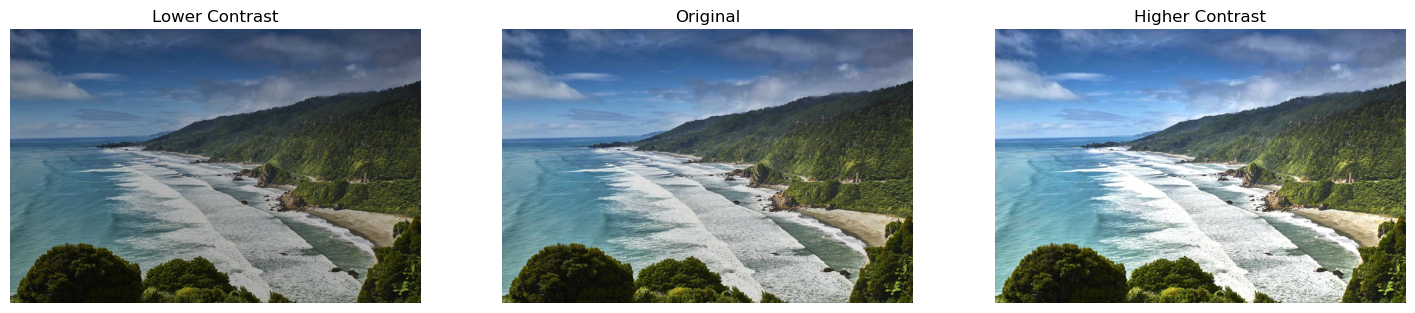

In [6]:
# Contrast adjustment factors
matrix1 = np.ones(img_rgb.shape) * 0.8  # lower contrast
matrix2 = np.ones(img_rgb.shape) * 1.2  # higher contrast

# Apply contrast changes
img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Plot results
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast"); plt.axis("off")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast"); plt.axis("off")
plt.show()


Thresholded Image Shape: (1000, 1500)


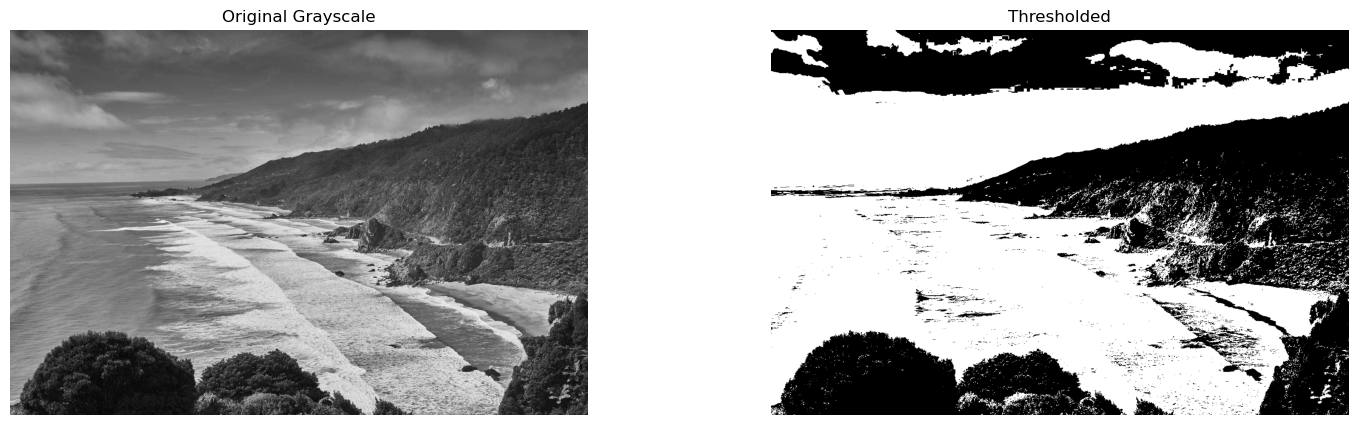

In [7]:
# Convert image to grayscale for thresholding
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply threshold
retval, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

print("Thresholded Image Shape:", img_thresh.shape)

# Plot results
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_gray, cmap='gray'); plt.title("Original Grayscale"); plt.axis("off")
plt.subplot(122); plt.imshow(img_thresh, cmap='gray'); plt.title("Thresholded"); plt.axis("off")
plt.show()


In [8]:
# Demonstrating difference between NumPy addition and cv2.add
arr1 = np.array([200, 250], dtype=np.uint8).reshape(-1, 1)
arr2 = np.array([40, 40], dtype=np.uint8).reshape(-1, 1)

add_numpy = arr1 + arr2   # NumPy addition (wrap-around)
add_cv2 = cv2.add(arr1, arr2)  # OpenCV addition (saturated)

print("NumPy Addition:\n", add_numpy)
print("cv2.add Addition:\n", add_cv2)


NumPy Addition:
 [[240]
 [ 34]]
cv2.add Addition:
 [[240]
 [255]]
